# Linear Regression





https://www.statsmodels.org/stable/regression.html
https://www.wikiwand.com/en/Linear_regression
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/640px-Linear_least_squares_example2.png?raw=true)


# 5. How to Implement Linear Regression using statsmodels and sklearn

For this task we are using the merged CLEAN1B, 1B, 1C and goodbad we are not tacking in consideration:

In [38]:
%matplotlib inline

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
from scipy import linalg
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [10]:
url_data = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/data_reg.csv"
df = pd.read_csv(url_data,sep=',' ) # for specify the index we use here the colums "0" when reading the data: , index_col=0

In [11]:
# Check the column names
print(list(df.columns))

['MATCHKEY', 'RBAL', 'TRADES', 'AGE', 'AGE_groups', 'DELQID', 'CRELIM', 'goodbad', 'BRNEW', 'BRAGE']


# Let just do a Simple (single variable) Linear Regression model

In [28]:
 
y = df['RBAL']
X = df['CRELIM']

X = X.values
y = y.values




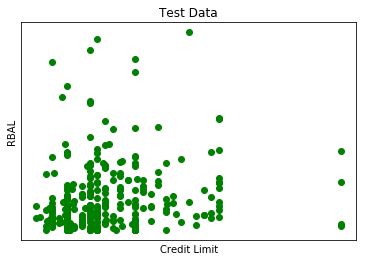

In [43]:
#split/create the dataset in train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot outputs
plt.scatter(X_test, y_test,  color='green')
plt.title('Test Data')
plt.xlabel('Credit Limit')
plt.ylabel('RBAL')
plt.xticks(())
plt.yticks(())
 
plt.show()

In [35]:
X=X.reshape(len(X),1)
y=y.reshape(len(y),1)

# Create and fit the model sklearn

Coefficients: 
 [[1.34075421]]
Mean squared error: 60678705.44
Variance score: -0.00


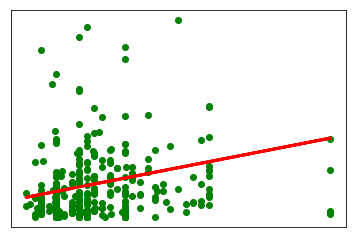

In [44]:
# adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


#split/create the dataset in train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, y_train)
 
# Plot outputs
#plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [46]:
# prediction we can do as follow:
print((regr.predict(5000)))

[[11257.63961187]]


### Using statsmodels

In [50]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as sm

# create a fitted model in one line
lm = sm.ols(formula='RBAL ~ CRELIM', data=df).fit()

# print the coefficients
lm.params

Intercept    4995.947242
CRELIM          1.086316
dtype: float64

### Interpreting Model Coefficients
How do we interpret the CRELIM coefficient ($\beta_1$)?

* A "unit" increase in CRELIM ad spending is associated with a 1.086316 "unit" increase in RBAL.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

In [52]:
# manually calculate the prediction
y2 = 4995.947242 + 1.086316*2

y2

4998.119874

In [55]:
# Plot the Least Square Line:

In [56]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'CRELIM': [df.CRELIM.min(), df.CRELIM.max()]})
X_new.head()

,CRELIM
0,0
1,10000


In [58]:
# make predictions for those x values and store them# make p 
preds = lm.predict(X_new)
preds

0     4995.947242
1    15859.110459
dtype: float64

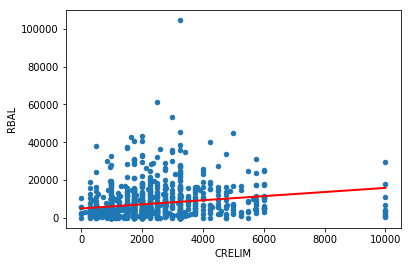

In [59]:
# first, plot the observed data
data.plot(kind='scatter', x='CRELIM', y='RBAL')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [60]:
# print the confidence intervals for the model coefficients  
lm.conf_int()

,0,1
Intercept,4057.410683,5934.483800
CRELIM,0.737865,1.434768


In [61]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    2.603436e-24
CRELIM       1.361365e-09
dtype: float64

In [ ]:
# print a summary of the fitted model
lm.summary()

# Multivariable Linear Regression Model Example



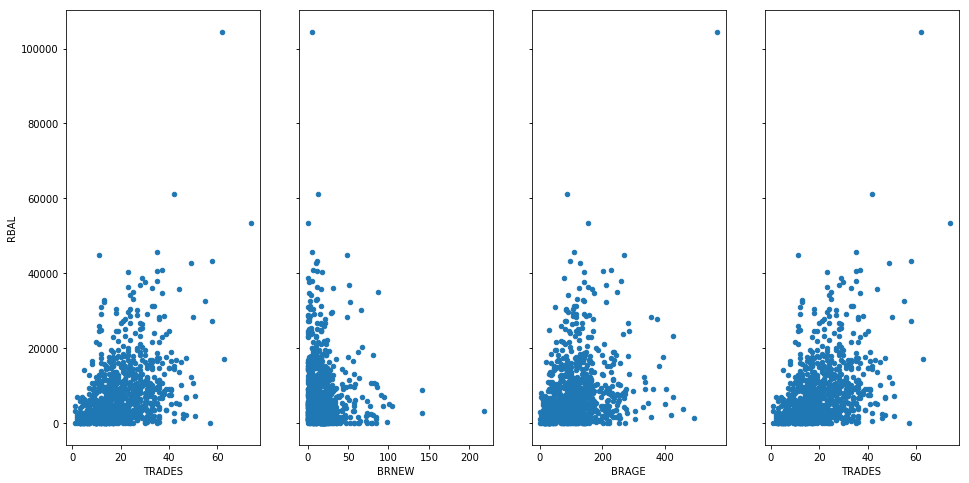

In [48]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='TRADES', y='RBAL', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='BRNEW', y='RBAL', ax=axs[1])
data.plot(kind='scatter', x='BRAGE', y='RBAL', ax=axs[2])
data.plot(kind='scatter', x='CRELIM', y='RBAL', ax=axs[3])

In [62]:
# create a fitted model with all three features# create 
lm = sm.ols(formula='RBAL ~ CRELIM + TRADES + BRNEW + BRAGE ', data=df).fit()

# print the coefficients
lm.params

Intercept   -2059.342973
CRELIM          1.051100
TRADES        323.495792
BRNEW         -14.594707
BRAGE          10.907857
dtype: float64

In [63]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RBAL   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     75.88
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           3.53e-56
Time:                        01:27:58   Log-Likelihood:                -10363.
No. Observations:                1000   AIC:                         2.074e+04
Df Residuals:                     995   BIC:                         2.076e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2059.3430    662.052     -3.111      0.002   -3358.522    -760.164
CRELIM         1.0511      0.163      6.445      0.000       0.731       1.371
TRADES       323.4958     26.633     12.146      0.000     271.232     375.760
BRNEW        -14.5947     13.628     -1.071      0.284     -41.338      12.149
BRAGE         10.9079      3.685      2.960      0.003       3.676      18.139
==============================================================================
Omnibus:                      585.774   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8473.242
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      16.432   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.920595e-03
CRELIM       1.798430e-10
TRADES       9.381749e-32
BRNEW        2.844719e-01
BRAGE        3.149014e-03
dtype: float64

# Use sklearn for Linear Regression:

In [82]:
# p-value and CI is not easy accesible in sklearn and needs calculation mostly. 

# create X and y# create 
feature_cols = ['CRELIM', 'TRADES', 'BRNEW', 'BRAGE']
X = df[feature_cols]
y = df.RBAL

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-2059.342973233587
[  1.05110044 323.49579202 -14.594707    10.90785692]


In [83]:
# pair the feature names with the coefficients
# builtin function zip does create an obsect so we list to can get the content
# source: https://docs.python.org/3/library/functions.html

zipped = zip(feature_cols, lm.coef_)

In [84]:
# pair the feature names with the coefficients

list(zipped)

[('CRELIM', 1.051100440417528),
 ('TRADES', 323.4957920205627),
 ('BRNEW', -14.594706997945849),
 ('BRAGE', 10.907856917807521)]

# Q&A